## Altair with simple, sample data

- **[Altair documentation](https://altair-viz.github.io/index.html)**


- [Vega-Lite site](https://vega.github.io/vega-lite/)
- [Vega-Lite documentation](https://vega.github.io/vega-lite/docs/)
- [Vega-Lite 2.0 Medium article](https://medium.com/@uwdata/introducing-vega-lite-2-0-de6661c12d58)
- [Vega-Lite 2.0 OpenVisConf 2017 talk](https://www.youtube.com/watch?v=9uaHRWj04D4)
- [About the Vega project](https://vega.github.io/vega/about/)

This is just a made-up data set inspired by a [Nature Methods article](https://www.nature.com/articles/nmeth.2807)

In [1]:
import pandas as pd
import altair as alt

### Load in sample data

We'll load all data into a Panda DataFrame. A DataFrame is just a special data structure that is meant for "tablular data", which is like a spreadsheet. DataFrames also have build-in functions that can modify and display the data.

This pretend data set has values for five items in five categories. It gives us a chance to play around with various visual representations. **The best choice depends on which comparisons are most important to the story you're trying to tell!**

In [2]:
df_orig = pd.read_csv('data/NatureBarValues.csv')

#### Preview the data

You can just type the name of the dataframe to get a printout of the contents

In [3]:
df_orig

,Item,Category 1,Category 2,Category 3,Category 4,Category 5
0,Item 1,6,29,18,30,7
1,Item 2,8,27,17,13,11
2,Item 3,10,21,16,4,19
3,Item 4,20,17,16,9,7
4,Item 5,23,5,15,19,2


### Make data "tidy"

The data isn't in the right form for visualization in Altair (or Tableau or ggplot2). Right now it's "wide" and it needs to be "tall". Once we "tidy" the data, each column will have only one type of information, and the same types of data won't be spread across multiple columns.

See my previous *Tidy Data in Python with JupyterLab*
[repository](https://github.com/emonson/tidy-data-python) and [video](https://library.capture.duke.edu/Panopto/Pages/Viewer.aspx?id=d8a3efe2-48d7-4505-acd3-a943013c2442)

In Pandas we do this by using the `melt()` function. We specify a list of columns that won't be pivoted using the `id_vars=` argument (here the list only has one item in it), and all other columns will be pivoted. We also here specify a name for the column that used to be the column headers. The `head()` method lets you view the first set of rows.

In [4]:
df = df_orig.melt(id_vars=["Item"],var_name="Category")
df.head(10)

,Item,Category,value
0,Item 1,Category 1,6
1,Item 2,Category 1,8
2,Item 3,Category 1,10
3,Item 4,Category 1,20
4,Item 5,Category 1,23
5,Item 1,Category 2,29
6,Item 2,Category 2,27
7,Item 3,Category 2,21
8,Item 4,Category 2,17
9,Item 5,Category 2,5


### Heatmap

A heatmap is a very compact visual representation of the data, where rectangles are colored by the values in each cell. We're not really good at quantitatively comparing color values, though, so this isn't a great representation if you want people to accurately detect the numerical patterns. Also, note that Category 3 values aren't distinguishable.


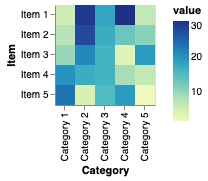

In [5]:
alt.Chart(df).mark_rect().encode(
    x = 'Category',
    y = 'Item',
    color = 'value'
)

### Vega-Lite specification

What Altair really produces is a Vega-Lite JSON declarative specification for building the visualization, and JupyterLab has Vega and Vega-Lite built in for rendering. This is a nice separation of concerns, where Altair just needs to know how to make JSON, and the renderer knows how to actually create the visuals!

We can see the specification behind each visualization by using `.to_json()` or `.to_dict()`. Here we'll use the latter, because the printout is more compact, but feel free to try the former.

**Note that all of the data is included in the JSON!!**

- [Medium article on Vega-Lite adoption](https://medium.com/@robin.linacre/why-im-backing-vega-lite-as-our-default-tool-for-data-visualisation-51c20970df39)

In [6]:
heatmap = alt.Chart(df).mark_rect().encode(
    x = 'Category',
    y = 'Item',
    color = 'value'
)
heatmap.to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'data': {'name': 'data-dcc63c1bd6179d79fcae39778c52b169'},
 'mark': 'rect',
 'encoding': {'color': {'type': 'quantitative', 'field': 'value'},
  'x': {'type': 'nominal', 'field': 'Category'},
  'y': {'type': 'nominal', 'field': 'Item'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json',
 'datasets': {'data-dcc63c1bd6179d79fcae39778c52b169': [{'Item': 'Item 1',
    'Category': 'Category 1',
    'value': 6},
   {'Item': 'Item 2', 'Category': 'Category 1', 'value': 8},
   {'Item': 'Item 3', 'Category': 'Category 1', 'value': 10},
   {'Item': 'Item 4', 'Category': 'Category 1', 'value': 20},
   {'Item': 'Item 5', 'Category': 'Category 1', 'value': 23},
   {'Item': 'Item 1', 'Category': 'Category 2', 'value': 29},
   {'Item': 'Item 2', 'Category': 'Category 2', 'value': 27},
   {'Item': 'Item 3', 'Category': 'Category 2', 'value': 21},
   {'Item': 'Item 4', 'Category': 'Category 2', 'value': 17}

### All data still included, even with a filter applied

One limitation of Altair is that **all of the data is included in the JSON, even if you're filtering down to a subset, or not using part of it!**

Here we'll filter down to just a single value of data...

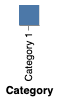

In [7]:
alt.Chart(df).mark_rect().encode(
    x = 'Category'
).transform_filter(
    "datum.Category == 'Category 1'"
)

...but all the data is still included in the JSON

In [8]:
heatmap = alt.Chart(df).mark_rect().encode(
    x = 'Category'
).transform_filter(
    "datum.Category == 'Category 1'"
)
heatmap.to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'data': {'name': 'data-dcc63c1bd6179d79fcae39778c52b169'},
 'mark': 'rect',
 'encoding': {'x': {'type': 'nominal', 'field': 'Category'}},
 'transform': [{'filter': "datum.Category == 'Category 1'"}],
 '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json',
 'datasets': {'data-dcc63c1bd6179d79fcae39778c52b169': [{'Item': 'Item 1',
    'Category': 'Category 1',
    'value': 6},
   {'Item': 'Item 2', 'Category': 'Category 1', 'value': 8},
   {'Item': 'Item 3', 'Category': 'Category 1', 'value': 10},
   {'Item': 'Item 4', 'Category': 'Category 1', 'value': 20},
   {'Item': 'Item 5', 'Category': 'Category 1', 'value': 23},
   {'Item': 'Item 1', 'Category': 'Category 2', 'value': 29},
   {'Item': 'Item 2', 'Category': 'Category 2', 'value': 27},
   {'Item': 'Item 3', 'Category': 'Category 2', 'value': 21},
   {'Item': 'Item 4', 'Category': 'Category 2', 'value': 17},
   {'Item': 'Item 5', 'Category': 'C

## MaxRowsError

Having all the data embedded in every visualization will not only bog down your notebook, it will eventually give you an error called the MaxRowsError. You can take off limit for number of rows, but that's not a great idea because you end up with huge notebooks!

Instead, we can specify that the outputs should just refer to a JSON file on your local drive and load in the data from there for each plot. This JSON file will be created automatically, it'll get reused within a session, and you'll never have to pay attention to it's name. 

See the [Altair tutorial notebook](https://github.com/altair-viz/altair-tutorial/blob/master/notebooks/03-Binning-and-aggregation.ipynb) `03-Binning-and-aggregation` for more details.

In [9]:
alt.data_transformers.enable('json')

# url = 'data/nature_bar_values_tidy.json'
# df.to_json(url, orient='records')

DataTransformerRegistry.enable('json')

### Now data is just referenced from JSON in Vega-Lite specification

In [10]:
heatmap = alt.Chart(df).mark_rect().encode(
    x = 'Category:O'
).transform_filter(
    "datum.Category == 'Category 1'"
)

heatmap.to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'data': {'url': 'altair-data-734e125f330dd2d43ae418168a63d485.json',
  'format': {'type': 'json'}},
 'mark': 'rect',
 'encoding': {'x': {'type': 'ordinal', 'field': 'Category'}},
 'transform': [{'filter': "datum.Category == 'Category 1'"}],
 '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json'}

## Other visual encodings

Let's get back to generating other alternative visual encodings for the data that will be better suited for particular comparisons we're trying to make easy for the audience.

### Rect with size variation

*Note that now we're specifying the variable types*, in this case so Altair will give us a categorical (nominal) color scheme instead of ordinal.

[Encoding data types](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types)

|Data Type|Shorthand Code|Description
|---|---|---
|quantitative|Q|a continuous real-valued quantity
|ordinal|O|a discrete ordered quantity
|nominal|N|a discrete unordered category
|temporal|T|a time or date value

Try switching the variable type for the color and see what difference it makes.

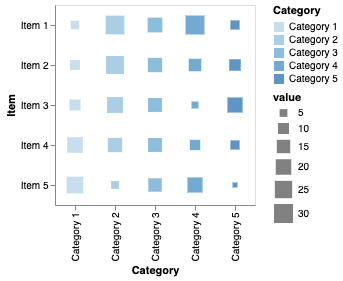

In [11]:
alt.Chart(df).mark_square().encode(
    x = 'Category:O',
    y = 'Item:O',
    color = 'Category:O',
    size = 'value:Q'
).properties(
    width = 200,
    height = 200
)

### Comparing summed levels with Stacked bar

Stacked bars can help if part of the main story is the overall sums within Items

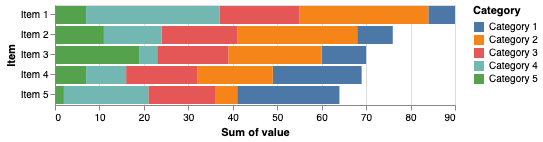

In [12]:
alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N'
)

### Comparing within item bars

If we want people to be able to make comparisons across categories within each item, say whether Category 2 or 4 is larger in Item 1, we need to give them a common baseline.

*Note that we could alternatively specified `row = 'Item:O'` right within the encoding instead of needing the `.facet()` section.*

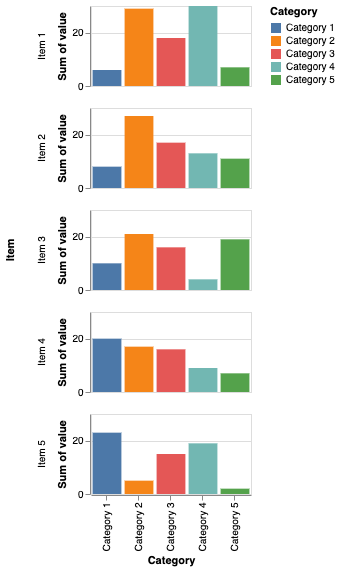

In [13]:
alt.Chart(df).mark_bar().encode(
    x = 'Category:O',
    y = 'sum(value):Q',
    color = 'Category:N'
).properties(
    width = 160,
    height = 80
).facet(
    row='Item:O'
)

### Horizontally-grouped bars don't work as well

Within an item is just fine, but the vertically-stacked small multiples (row facets) make it possible to still do some (non-common baseline) comparisons down wtihin a category, but visually it's harder to do that when groups are horizontal, as is a common default.

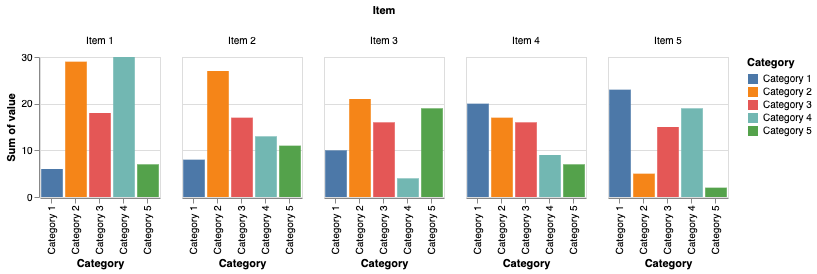

In [23]:
alt.Chart(df).mark_bar().encode(
    x = 'Category:O',
    y = 'sum(value):Q',
    color = 'Category:N'
).properties(
    width = 120,
    height = 140
).facet(
    column='Item:O'
)

### Dot plot for the same comparison

Another way to give the categories within an item a common baseline is to make a dot plot. This works well as long as there isn't too much value overlap.

*Note: Default is grid lines on continuous scale axes and not on nominal or ordinal, but I want lines along each item to help guide the eye. [Top-level configuration docs](https://altair-viz.github.io/user_guide/configuration.html). We also could have specified the circle size in the `encode()` section with `size = alt.value(150)`.*

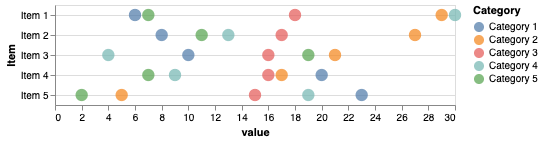

In [14]:
alt.Chart(df).mark_circle(size=150).encode(
    x = 'value:Q',
    y = 'Item:O',
    color = 'Category:N'
).configure_axisY(grid=True).configure_axisX(grid=False)

### Back to the stacked bar

What if we wanted to compare the lengths within a category? We're bad at comparing bar sizes that don't have common baselines.

*Note that the bar color stacking puts the first legend item furthest right, so here we've added an "order" (and a tooltip for fun).*

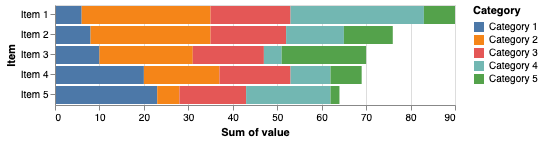

In [15]:
alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N',
    order = alt.Order('Category:O', sort='ascending'),
    tooltip=['Item','Category','sum(value)']
)

### Comparing within category bars

The common baseline again gives us easy comparisons within a category

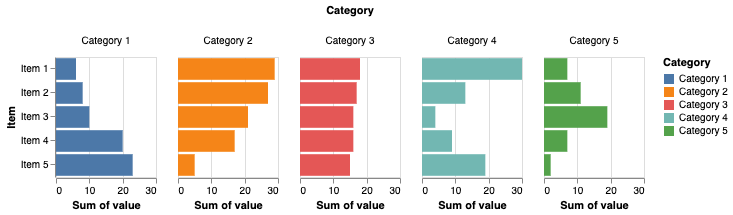

In [16]:
alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N'
).properties(
    width = 100,
    height = 120
).facet(
    column='Category:O'
)

#### Equivalent faceting by putting row or column in encode()

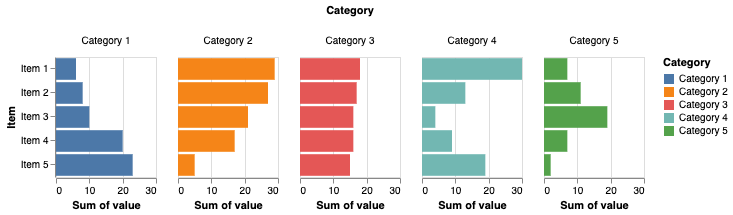

In [17]:
alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N',
    column = 'Category:O'
).properties(
    width = 100,
    height = 120
)

## Saving to files

It's easy to save out an HTML file for the visualization, or the JSON specification. These will get saved in the same directory as JupyterLab is running.

In [18]:
bars = alt.Chart(df).mark_bar().encode(
    x = 'sum(value):Q',
    y = 'Item:O',
    color = 'Category:N'
)

In [19]:
bars.save('stacked_bars.html')
bars.save('stacked_bars.json')